## Image Kernel Concept

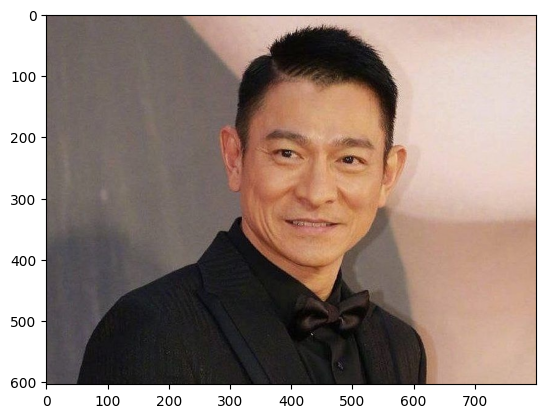

float32


In [1]:
# Image Kernel Process = Convolve2D
import matplotlib.pyplot as plt
from scipy import misc, signal 
import numpy as np

im = plt.imread('andy2.jpg').astype('float32') / 255.0
plt.imshow(im)
plt.show()
print(im.dtype)

In [2]:
im.min(), im.max()

(0.0, 1.0)

In [3]:
print(im.shape)
im[..., 0].shape # R-0 G-1 B-2

(604, 800, 3)


(604, 800)

In [4]:
import numpy as np
np.clip([-0.1, 0.1, 1.1, 1.2], 0, 1)

array([0. , 0.1, 1. , 1. ])

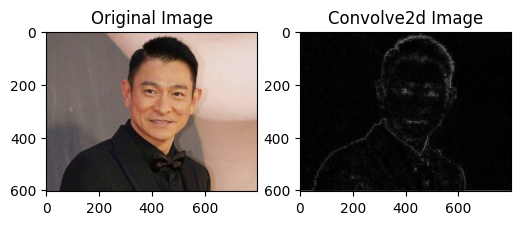

In [7]:
# sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpen_kernel = np.array([ -1, -1, -1, -1, 8, -1, -1, -1, -1]).reshape(3, 3)
# sharpen_kernel = np.array([1, 2, 1, 2, 4, 2, 1, 2, 1]).reshape(3, 3) / 16
# sharpen_kernel = np.array([0, 1, 0, 1, -4, 1, 0, 1, 0]).reshape(3, 3)
# sharpen_kernel = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
im_sharpened = np.ones(im.shape)
for i in range(3): # 3 : RGB [..., 0]
    im_sharpened[..., i] = np.clip(signal.convolve2d(im[...,i], 
                                                     sharpen_kernel, 
                                                     mode = 'same', 
                                                     boundary = "fill"), 0, 1)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (6, 6))
ax[0].imshow(im)
ax[0].set_title('Original Image', size = 12)
ax[1].imshow(im_sharpened)
ax[1].set_title('Convolve2d Image', size = 12)
plt.show()

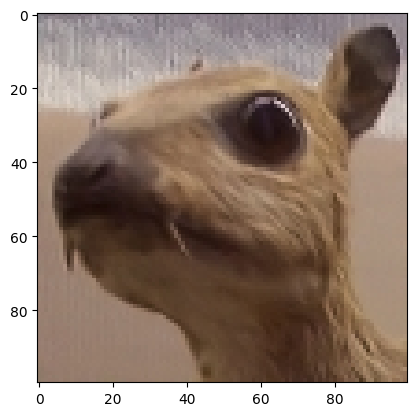

float32


In [8]:
import matplotlib.pyplot as plt
from scipy import misc, signal 
import numpy as np

im = plt.imread('Vd-Orig.png')
plt.imshow(im)
plt.show()
print(im.dtype)

In [9]:
im.min(), im.max()

(0.019607844, 0.8862745)

In [10]:
sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
# sharpen_kernel = np.array([-1, -1, -1, -1, 8, -1, -1, -1 ,-1]).reshape(3, 3)
# sharpen_kernel = np.array([1, 2, 1, 2, 4, 2, 1, 2, 1]).reshape(3, 3) / 16
# sharpen_kernel = np.array([0, 1, 0, 1, -4, 1, 0, 1, 0]).reshape(3, 3)
# sharpen_kernel = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
im_sharpened = np.ones(im.shape)
for i in range(3): # 3 : RGB [..., 0]
    im_sharpened[..., i] = signal.convolve2d(im[...,i],
                                             sharpen_kernel,
                                             mode = 'same',
                                             boundary = "fill")

im_sharpened.min(), im_sharpened.max()

(-1.1764706298708916, 2.8666666746139526)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


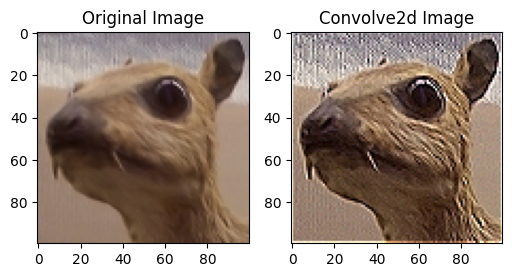

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols = 2,figsize = (6, 6))
ax[0].imshow(im)
ax[0].set_title('Original Image', size = 12)
ax[1].imshow(im_sharpened)
ax[1].set_title('Convolve2d Image', size = 12)
plt.show()

## Deep Learning_CNN_MNIST

In [12]:
# 導入函式庫
import numpy as np  
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from matplotlib import pyplot as plt
import os

# 載入MNIST資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 建立簡單的線性執行的模型
model = keras.models.Sequential()

model.add(Conv2D(filters = 12, kernel_size = (3, 3),
                 activation = 'relu', padding = 'same',
                 input_shape = (28, 28, 1))) # 28 * 28 * 1(單色階)
model.add(MaxPooling2D(pool_size = (2, 2))) # 28 / 2 = 14
model.add(Flatten())

# Add Input layer：隱藏層(hidden layer)有256個輸出變數
model.add(Dense(units = 400,  activation = 'relu'))
model.add(Dense(units = 200, activation = 'relu'))
# Add Output layer
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'softmax'))

# 選擇損失函數、優化方法及成效衡量方式
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 將training的label進行one-hot encoding
y_TestOneHot = np_utils.to_categorical(y_test) 
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 

# 將training的Input資料轉為2維
X_train_2D = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test_2D = X_test.reshape(10000, 28, 28, 1).astype('float32')

x_Train_norm = X_train_2D / 255
x_Test_norm = X_test_2D / 255

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 12)        120       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 12)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2352)              0         
                                                                 
 dense (Dense)               (None, 400)               941200    
                                                                 
 dense_1 (Dense)             (None, 200)               80200     
                                                                 
 dense_2 (Dense)             (None, 10)                2010      
                                                        

In [13]:
x_Train_norm.min(), x_Train_norm.max()

(0.0, 1.0)

In [14]:
x_Train_norm.shape

(60000, 28, 28, 1)

In [15]:
# 進行訓練, 訓練過程會存在 train_history 變數中
# callback
train_history = model.fit(x = x_Train_norm,
                          y = y_TrainOneHot,
                          validation_split = 0.2,
                          epochs = 5,
                          batch_size = 200,
                          verbose = 2)

Epoch 1/5
240/240 - 7s - loss: 0.3193 - accuracy: 0.9099 - val_loss: 0.1228 - val_accuracy: 0.9634 - 7s/epoch - 27ms/step
Epoch 2/5
240/240 - 6s - loss: 0.0917 - accuracy: 0.9732 - val_loss: 0.0768 - val_accuracy: 0.9759 - 6s/epoch - 24ms/step
Epoch 3/5
240/240 - 5s - loss: 0.0557 - accuracy: 0.9833 - val_loss: 0.0671 - val_accuracy: 0.9786 - 5s/epoch - 23ms/step
Epoch 4/5
240/240 - 6s - loss: 0.0392 - accuracy: 0.9874 - val_loss: 0.0589 - val_accuracy: 0.9810 - 6s/epoch - 24ms/step
Epoch 5/5
240/240 - 6s - loss: 0.0279 - accuracy: 0.9913 - val_loss: 0.0560 - val_accuracy: 0.9833 - 6s/epoch - 24ms/step


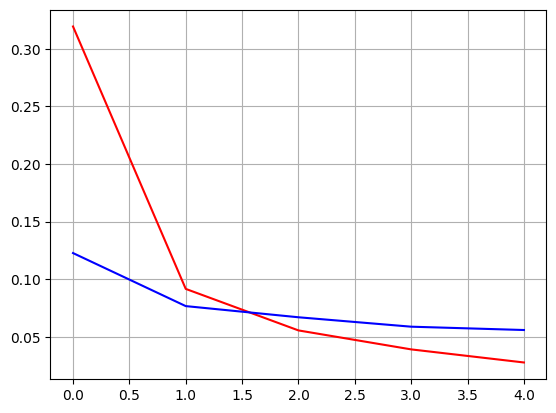

In [16]:
%matplotlib inline
plt.plot(train_history.history['loss'], color = 'red')
plt.plot(train_history.history['val_loss'], color = 'blue')
plt.grid()
plt.show()

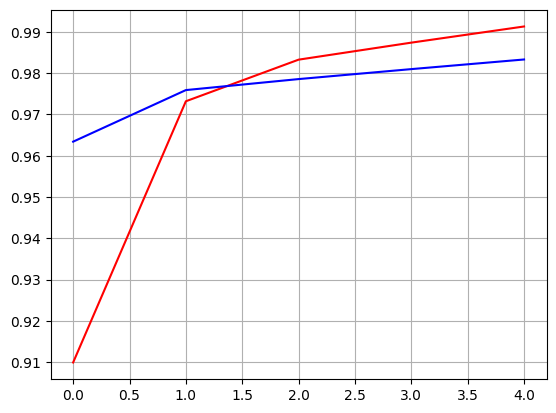

In [17]:
%matplotlib inline
plt.plot(train_history.history['accuracy'], color = 'red')
plt.plot(train_history.history['val_accuracy'], color = 'blue')
plt.grid()
plt.show()

In [18]:
# 顯示訓練成果(分數) 99.3%
scores = model.evaluate(x_Train_norm, y_TrainOneHot)
print()
print("\t[Info] Accuracy of training data = {:2.1f}%".format(scores[1] * 100.0))

1875/1875 [==============================] - 15s 8ms/step - loss: 0.0256 - accuracy: 0.9926

	[Info] Accuracy of training data = 99.3%


In [19]:
# 顯示訓練成果(分數) 98.5%
scores = model.evaluate(x_Test_norm, y_TestOneHot)
print()
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1] * 100.0))

313/313 [==============================] - 3s 9ms/step - loss: 0.0462 - accuracy: 0.9851

	[Info] Accuracy of testing data = 98.5%


In [22]:
# how to read sample image and detect 
!dir *.png

 磁碟區 C 中的磁碟是 OS
 磁碟區序號:  221C-7CE4

 C:\Python\Level_III\Day05 的目錄

2023/03/21  上午 02:31               274 6.png
2023/03/21  上午 01:25            20,853 Vd-Orig.png
               2 個檔案          21,127 位元組
               0 個目錄  362,466,865,152 位元組可用


In [25]:
!pip install scikit-image

     ---------------------------------------- 23.7/23.7 MB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 3.4/3.4 MB 6.1 MB/s eta 0:00:00
     -------------------------------------- 218.6/218.6 kB 6.7 MB/s eta 0:00:00


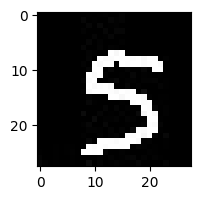

In [31]:
import matplotlib.pyplot as plt
from skimage import color
test = color.rgb2gray(plt.imread('5.jpg'))
plt.figure(figsize = (2,2))
plt.imshow(test, cmap = 'gray')
plt.show()

In [32]:
test.shape # 需要轉換成（1張, 28上下, 28左右, 1單色階）
test.min(), test.max()

(0.0, 1.0)

In [33]:
import numpy as np
print(model.predict(test.reshape(1, 28, 28, 1)))
print(np.argmax(model.predict(test.reshape(1, 28, 28, 1))))

[[7.4927141e-13 1.4594952e-11 3.0694852e-12 1.4761887e-05 5.5174858e-12
  9.9997973e-01 7.0819417e-09 3.9227858e-13 4.6815990e-06 7.7217993e-07]]
5
